In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Se carga el conjunto de datos manuscritos
mnist = keras.datasets.mnist

# Se carga la division de entrenamiento y prueba de conjunto de datos MINST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


In [9]:
# Se prueban los valores de pixeles y se prueban las imagenes
training_images = training_images / 255.0
test_images = test_images /255.0

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [14]:
#Compilamos el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0411 - accuracy: 0.9876
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0093 - accuracy: 0.9970
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0052 - accuracy: 0.9982
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0048 - accuracy: 0.9985
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0042 - accuracy: 0.9987
Epoch 10/10
1875/1875 [==============================] - 38s 20m

<Axes: >

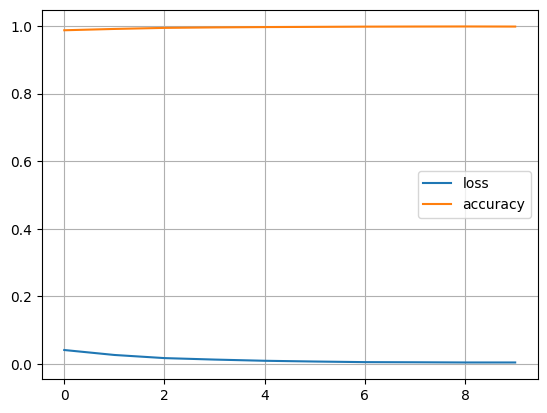

In [16]:
history = model.fit(training_images, training_labels, epochs=10)

# Se grafica el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [17]:
# Evaluamos el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluamos el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de pruebas:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.9990
Pérdida en el conjunto de entrenamiento: 0.0027827275916934013
Precisión en el conjunto de entrenamiento: 0.9990000128746033
313/313 [==============================] - 2s 6ms/step - loss: 0.0614 - accuracy: 0.9869
Pérdida en el conjunto de pruebas: 0.061376702040433884
Precisión en el conjunto de prueba: 0.9868999719619751


In [19]:
# predicción
index = 1
print(f'Label: {test_labels[index]}')
clasiffication = model.predict(test_images[index:index+1])
print(f'Classification:\n {clasiffication.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 208ms/step
Classification:
 [[1.0008395e-15]
 [3.1776174e-15]
 [1.0000000e+00]
 [5.9853513e-21]
 [1.0487047e-19]
 [1.3885091e-25]
 [5.9481999e-15]
 [1.8878936e-19]
 [1.1477542e-20]
 [2.5309398e-19]]


In [20]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [21]:
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

0
0
0


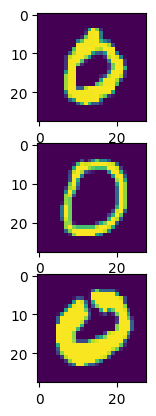

In [22]:
f, axarr = plt.subplots(3,1)

axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [25]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [ layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 21ms/step


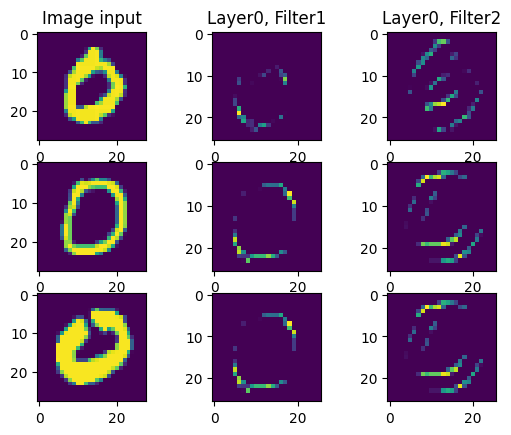

In [27]:
f, axarr = plt.subplots(3,3)

axarr[0, 0].set_title("Image input")
axarr[0, 0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0, 1].set_title("Layer" + str(layer) + ", Filter1")
axarr[0, 1].imshow(f1[0, : , :, filter1])
axarr[0, 2].set_title("Layer" + str(layer) + ", Filter2")
axarr[0, 2].imshow(f1[0, : , :, filter2])

axarr[1, 0].imshow(test_images[SECOND_IMAGE])
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1, 1].imshow(f2[0, : , :, filter1])
axarr[1, 2].imshow(f2[0, : , :, filter2])

axarr[2, 0].imshow(test_images[THIRD_IMAGE])
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2, 1].imshow(f2[0, : , :, filter1])
axarr[2, 2].imshow(f2[0, : , :, filter2])